In [0]:
import pandas as pd

import numpy as np
from numpy import linalg as LA
from numpy.linalg import *

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Linear Regression

In [0]:
'''
    Linear Regression via Gradient Descent
'''

class LinearRegression:

    def __init__(self, init_theta=None, alpha=0.01, n_iter=100):
        '''
        Constructor
        '''
        self.alpha = alpha
        self.n_iter = n_iter
        self.theta = init_theta
        self.JHist = None
    

    def gradientDescent(self, X, y, theta):
        '''
        Fits the model via gradient descent
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            theta is a d-dimensional numpy vector
        Returns:
            the final theta found by gradient descent
        '''
        n,d = X.shape
        self.JHist = []
        for i in range(self.n_iter):
            self.JHist.append( (self.computeCost(X, y, theta), theta) )
            # print("Iteration: ", i+1, " Cost: ", self.JHist[i][0], " Theta.T: ", theta.T)
            yhat = X*theta
            theta = theta -  (X.T * (yhat - y)) * (self.alpha / n)
        return theta
    

    def computeCost(self, X, y, theta):
        '''
        Computes the objective function
        Arguments:
          X is a n-by-d numpy matrix
          y is an n-dimensional numpy vector
          theta is a d-dimensional numpy vector
        Returns:
          a scalar value of the cost  
              ** Not returning a matrix with just one value! **
        '''
        n,d = X.shape
        yhat = X*theta
        J =  (yhat-y).T * (yhat-y) / n
        J_scalar = J.tolist()[0][0]  # convert matrix to scalar
        return J_scalar
    

    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d Pandas Dataframe
            y is an n-dimensional Pandas Series
        '''
        n = len(y)
        X = X.to_numpy()
        X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term
        print(X)
        
        y = y.to_numpy()
        n,d = X.shape
        y = y.reshape(n,1)

        if self.theta is None:
            self.theta = np.matrix(np.zeros((d,1)))

        self.theta = self.gradientDescent(X,y,self.theta)   


    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d Pandas DataFrame
        Returns:
            an n-dimensional numpy vector of the predictions
        '''
        X = X.to_numpy()
        X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term
        return pd.DataFrame(X*self.theta)

### Test code for linear regression

In [0]:
def test_linreg(n_iter = 2000):
  # load the data
  filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw2-multivariateData.csv"
  df = pd.read_csv(filepath, header=None)

  X = df[df.columns[:-1]]
  y = df[df.columns[-1]]

  n,d = X.shape

  # # Standardize features
  from sklearn.preprocessing import StandardScaler
  standardizer = StandardScaler()
  X = pd.DataFrame(standardizer.fit_transform(X))  # compute mean and stdev on training set for standardization

  # # initialize the model
  init_theta = np.matrix(np.random.randn((d+1))).T
  alpha = 0.01

  # # Train the model
  lr_model = LinearRegression(init_theta = init_theta, alpha = alpha, n_iter = n_iter)
  lr_model.fit(X,y)

  # # Compute the closed form solution
  X = np.asmatrix(X.to_numpy())
  X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term
  y = np.asmatrix(y.to_numpy())
  n,d = X.shape
  y = y.reshape(n,1)
  thetaClosedForm = inv(X.T*X)*X.T*y
  print("thetaClosedForm: ", thetaClosedForm.T)

# Run the Linear Regression Test

In [0]:
test_linreg(2000)

# Polynomial Regression

In [0]:
import numpy as np
from sklearn.metrics import mean_squared_error

#-----------------------------------------------------------------
#  Class PolynomialRegression
#-----------------------------------------------------------------

class PolynomialRegression:

    def __init__(self, degree = 1, regLambda = 1E-8, tuneLambda = False, regLambdaValues = None):
        '''
        Constructor
        '''
        #TODO
        self.degree = degree
        self.regLambda = regLambda
        self.tuneLambda = tuneLambda
        self.regLambdaValues = regLambdaValues
        self.theta = np.matrix(np.zeros((degree+1,1)))
        self.alpha = 0.25
        self.epsilon = 0.0001
        self.max_iter = 100000

    def polyfeatures(self, X, degree):
        '''
        Expands the given X into an n * d array of polynomial features of
            degree d.

        Returns:
            A n-by-d data frame, with each column comprising of
            X, X * X, X ** 3, ... up to the dth power of X.
            Note that the returned matrix will not include the zero-th power.

        Arguments:
            X is an n-by-1 data frame
            degree is a positive integer
        '''
        #TODO
        X = np.array(X)
        n = X.shape[0]

        poly_features = np.zeros((n, degree))

        for i in range(n):
          x = X[i]

          for j in range(degree):
            # poly_features[i, j] = x ** (j + 1)
            poly_features[i, j] = np.power(x, j + 1)

        poly_features = pd.DataFrame(poly_features)

        return poly_features
        
    def computeCost(self, X, y, theta, regLambda):

        n,d = X.shape
        # yhat = X*theta
        yhat = X.dot(theta)
        # J =  (yhat-y).T * (yhat-y) / n + regLambda * (theta.T * theta)
        J =  ((((yhat-y).T).dot(yhat-y)) / n) + (regLambda * (theta.T).dot(theta))
        J_scalar = J.tolist()[0][0]  # convert matrix to scalar

        return J_scalar

    def gradientDescent(self, X, y, theta, regLambda):

        theta_old = theta
        n,d = X.shape
        self.JHist = []

        # i = 0
        # while True:
        for i in range(self.max_iter):
            # self.JHist.append( (self.computeCost(X, y, theta_old, regLambda), theta_old) )
            # print("Iteration: ", i+1, " Cost: ", self.JHist[i][0], " Theta.T: ", theta_old.T)
            # yhat = X*theta_old
            yhat = X.dot(theta_old)
            # theta_new = theta_old - (X.T * (yhat - y)) * (self.alpha / n) - self.alpha * regLambda * theta_old
            # theta_new = theta_old - (((X.T).dot(yhat-y)) * (self.alpha / n)) - ((self.alpha * regLambda) * theta_old)

            regulate = regLambda * self.alpha * theta_old
            regulate[0] = 0 
            theta_new = theta_old - ((X.T).dot(yhat - y)) * (self.alpha / (2*n)) - regulate
            # theta_new = theta_old - ((X.T).dot(yhat - y)) * (self.alpha / n) - regulate

            if LA.norm(theta_new - theta_old) < self.epsilon:
              break

            else:
              theta_old = theta_new
              # i += 1

        return theta_old

    def fit(self, X, y):
        '''
            Trains the model
            Arguments:
                X is a n-by-1 data frame
                y is an n-by-1 data frame
            Returns:
                No return value
            Note:
                You need to apply polynomial expansion and scaling first
        '''
        #TODO
        n = len(y)
        X = np.array(X)
        X = np.array(self.polyfeatures(X, self.degree))
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X = (X - mean) / std
        X = np.c_[np.ones((n, 1)), X]

        y = np.array(y)
        n, d = X.shape
        y = y.reshape(n,1)

        # if self.theta is None:
        #     self.theta = np.matrix(np.zeros((d,1)))

        # self.theta = self.gradientDescent(X,y,self.theta,self.regLambda)

        if self.tuneLambda == True:
          dictionary = {}
          for lambda_value in self.regLambdaValues:
            thetahat = self.gradientDescent(X,y,self.theta,lambda_value)

            yhat = X*thetahat
            RMSE = np.sqrt(mean_squared_error(y, yhat))
            dictionary[lambda_value] = RMSE
          
          lambda_optimal = min(dictionary, key=dictionary.get)
          print('Optimal Lambda: ' + str(lambda_optimal))
          print('Lambda values; RMSE: ' + str(dictionary))

          self.theta = np.matrix(np.zeros((d,1)))
          self.theta = self.gradientDescent(X,y,self.theta,lambda_optimal)
          
          #   # Loop through trials
          #   # for i in range(5):
          #     dataset = np.concatenate((X,y.reshape(-1,1)),axis=1)
          #     # Store each cv score in list
          #     scores = []
          #     # Split dataset into folds
          #     # np.random.shuffle(dataset)
          #     data_split = np.array_split(dataset, 3)

          #     # Loop through folds
          #     for k in range(len(data_split)):
      
          #       # Test set
          #       test_set = data_split[k]

          #       # Train set
          #       train_lst = []
          #       for i in range(len(data_split)):
          #         if i != k:
          #           train_lst.append(data_split[i])
          #       train_set = np.concatenate(train_lst,axis=0)

          #       # Split into X,y
          #       X_train = train_set[:,:-1]
          #       y_train = train_set[:,-1]
          #       X_test = test_set[:,:-1]
          #       y_test = test_set[:,-1]

          #       # Score
          #       thetahat = self.gradientDescent(X_train,y_train,self.theta,self.regLambda)
          #       yhat = X_test.dot(thetahat)
          #       RMSE = np.sqrt(mean_squared_error(y_test, yhat))
          #       scores.append(RMSE)

          #     dictionary[lambda_value] = np.mean(scores)

          # lambda_optimal = min(dictionary, key=dictionary.get)
          # self.theta = self.gradientDescent(X,y,self.theta,lambda_optimal)

        else:
          self.theta = self.gradientDescent(X,y,self.theta,self.regLambda)
          # self.theta = np.matmul(np.matmul(linalg.pinv(np.matmul(np.transpose(X),X)), np.transpose(X)), y)
          # self.theta = np.dot(np.dot(np.linalg.pinv(X.T * X), X.T), y)
          # self.theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y) 
          print(self.theta)
  
    def predict(self, X):
        '''
        Use the trained model to predict values for each instance in X
        Arguments:
            X is a n-by-1 data frame
        Returns:
            an n-by-1 data frame of the predictions
        '''
        # TODO
        X = np.array(X)
        X = self.polyfeatures(X, self.degree)
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X = (X - mean) / std
        n, d = X.shape
        X = np.c_[np.ones((n, 1)), X]

        # predictions = pd.DataFrame(X * self.theta)
        predictions = pd.DataFrame(X.dot(self.theta))

        return predictions

# Test Polynomial Regression

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def test_polyreg_univariate():
    '''
        Test polynomial regression
    '''

    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw2-polydata.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[:-1]]
    y = df[df.columns[-1]]

    # regression with degree = d
    d = 8
    regLambdaList = [0, 0.001, 0.003, 0.006, 0.01, 0.03, 0.006, 0.1, 0.3, 0.6, 1, 3]
    model = PolynomialRegression(degree = d, regLambda = 0, tuneLambda = True, regLambdaValues = regLambdaList)
    # model = PolynomialRegression(degree = d, regLambda = 1E-8, tuneLambda = False, regLambdaValues = regLambdaList)
    model.fit(X, y)
    
    # output predictions
    xpoints = pd.DataFrame(np.linspace(np.max(X), np.min(X), 100))
    ypoints = model.predict(xpoints)

    # plot curve
    plt.figure()
    plt.plot(X, y, 'rx')
    plt.title('PolyRegression with d = '+str(d))
    plt.plot(xpoints, ypoints, 'b-')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

Optimal Lambda: 0
Lambda values; RMSE: {0: 11.321393992455604, 0.001: 11.893192756799126, 0.003: 12.25795902834811, 0.006: 12.428922300277415, 0.01: 12.535703447535157, 0.03: 12.748039848109089, 0.1: 12.968310988708781, 0.3: 13.214692456463103, 0.6: 13.400481996262457, 1: 13.560132987700714, 3: 14.098778854318041}


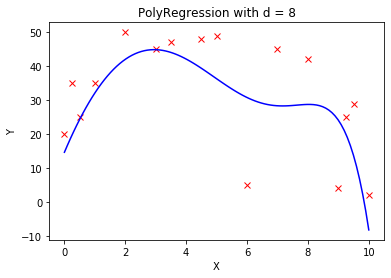

In [0]:
test_polyreg_univariate()